# Stock Price Open Prediction Model

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [9]:
ESCORT=pd.read_csv("ESCORT10yrs.csv")
ESCORT.head()

,Date,Stock_price_open,ESCORT_CLOSE_PRICE
0,02-01-2012,67.300003,62.155628
1,03-01-2012,69.150002,64.239838
2,04-01-2012,68.150002,62.989307
3,05-01-2012,66.750000,61.738796
4,06-01-2012,NaN,61.785107


In [10]:
ESCORT.dropna(inplace=True)

In [11]:
NIFTY=pd.read_csv("NIFTY 50.csv")
NIFTY.dropna(inplace=True)
NIFTY

,Date,NIFTY_50_OPEN_PRICE,NIFTY_50_CLOSE_PRICE
0,04-01-2000,1634.55,1638.70
1,05-01-2000,1595.80,1595.80
2,06-01-2000,1616.60,1617.60
3,07-01-2000,1615.65,1613.30
4,10-01-2000,1633.25,1632.95
...,...,...,...
5056,05-05-2020,9226.80,9205.60
5057,06-05-2020,9234.05,9270.90
5058,07-05-2020,9376.95,9199.05
5059,08-05-2020,9348.15,9251.50


In [12]:
shangai=pd.read_csv("shangai.csv")
shangai.dropna(inplace=True)
shangai

,Date,SHANGAI_OPEN_PRICE,SHANGAI_CLOSE_PRICE
1,04-01-2000,1366.579956,1406.370972
2,05-01-2000,1368.692993,1409.682007
3,06-01-2000,1407.828979,1463.942017
4,07-01-2000,1406.036011,1516.604004
5,10-01-2000,1477.154053,1545.112061
...,...,...,...
5050,07-05-2020,2831.633057,2871.522949
5051,08-05-2020,2876.472900,2895.340088
5052,11-05-2020,2882.709961,2894.800049
5053,12-05-2020,2901.570068,2891.555908


In [13]:
Nasdaq=pd.read_csv("Nasdaq.csv")
Nasdaq.dropna(inplace=True)
Nasdaq


,Date,NASDAQ_CLOSE_PRICE
0,03-01-2000,4131.149902
1,04-01-2000,3901.689941
2,05-01-2000,3877.540039
3,06-01-2000,3727.129883
4,07-01-2000,3882.620117
...,...,...
5118,07-05-2020,8979.660156
5119,08-05-2020,9121.320313
5120,11-05-2020,9192.339844
5121,12-05-2020,9002.549805


In [14]:
nikki=pd.read_csv("nikki.csv")
nikki.dropna(inplace=True)
nikki

,Date,NIKKIE_OPEN_PRICE,NIKKIE_CLOSE_PRICE
0,05-01-2000,18937.44922,18542.55078
1,06-01-2000,19003.50977,18168.26953
2,07-01-2000,18574.00977,18193.41016
5,12-01-2000,18246.09961,18677.41992
6,13-01-2000,18780.16992,18833.28906
...,...,...,...
5100,24-04-2020,19313.03906,19262.00000
5101,27-04-2020,19331.85938,19783.22070
5102,28-04-2020,19410.83984,19771.18945
5103,30-04-2020,19776.17969,20193.68945


In [15]:
hansang=pd.read_csv("hansang.csv")
hansang.dropna(inplace=True)
hansang

,Date,HANGSENG_OPEN_PRICE,HANGSENG_CLOSE_PRICE
0,04-01-2000,17057.69922,17072.82031
1,05-01-2000,17303.00000,15846.71973
2,06-01-2000,16608.55078,15153.23047
3,07-01-2000,15942.07031,15405.62988
4,10-01-2000,15329.33984,15848.15039
...,...,...,...
5084,23-04-2020,23540.53906,23977.32031
5085,24-04-2020,23983.65039,23831.33008
5086,27-04-2020,23844.55078,24280.14063
5087,28-04-2020,24030.66016,24575.96094


In [16]:
Wipro=pd.read_csv("WIPRO0.NS.csv")
Wipro.dropna(inplace=True)
Wipro

,Date,Wipro_Open,Wipro_AdjClose
0,02-01-2012,150.880997,114.910942
1,03-01-2012,157.011993,119.951271
2,04-01-2012,155.886993,120.455070
3,05-01-2012,154.856003,119.504265
6,09-01-2012,151.518997,115.529930
...,...,...,...
2046,22-04-2020,179.399994,178.550003
2047,23-04-2020,179.949997,180.899994
2048,24-04-2020,180.000000,177.750000
2049,27-04-2020,182.100006,182.050003


In [17]:
CTSH=pd.read_csv("CTSH0.csv")
CTSH.dropna(inplace=True)
CTSH

,Date,Cogni_Open,Cogni_AdjClose
0,03-01-2012,32.799999,31.586964
1,04-01-2012,32.799999,31.702309
2,05-01-2012,33.625000,32.341549
3,06-01-2012,33.320000,31.918592
4,09-01-2012,33.740002,32.029144
...,...,...,...
2089,23-04-2020,52.599998,52.432030
2090,24-04-2020,54.389999,53.587227
2091,27-04-2020,57.139999,55.807995
2092,28-04-2020,58.130001,56.295963


In [18]:
infy=pd.read_csv("INFY0.csv")
infy.dropna(inplace=True)
infy


,Date,infyOpen,infy_AdjClose
0,03-01-2012,6.70000,3.116398
1,04-01-2012,6.65125,3.101822
2,05-01-2012,6.72625,3.149049
3,06-01-2012,6.77125,3.143802
4,09-01-2012,6.97125,3.226595
...,...,...,...
2116,02-06-2020,9.43000,9.380000
2117,03-06-2020,9.24000,9.270000
2118,04-06-2020,9.39000,9.270000
2119,05-06-2020,9.47000,9.380000


In [19]:
ORCL=pd.read_csv("ORCL0.csv")
ORCL.dropna(inplace=True)
ORCL


,Date,orclOpen,orcl_AdjClose
0,03-01-2012,25.950001,22.920240
1,04-01-2012,26.010000,23.053185
2,05-01-2012,26.670000,23.567247
3,06-01-2012,26.900000,23.868603
4,09-01-2012,27.180000,24.010731
...,...,...,...
2116,02-06-2020,53.330002,53.279999
2117,03-06-2020,53.230000,53.490002
2118,04-06-2020,53.090000,52.849998
2119,05-06-2020,53.349998,53.980000


In [20]:
df=pd.merge(hansang,Nasdaq, how='inner',on="Date")
df.shape

(4811, 4)

In [21]:
df=pd.merge(df,NIFTY, how='inner',on="Date")

In [22]:
df=pd.merge(df,nikki, how='inner',on="Date")

In [23]:
df=pd.merge(df,shangai, how='inner',on="Date")

In [24]:
df=pd.merge(df,ESCORT, how='inner',on="Date")

In [25]:
df=pd.merge(df,Wipro, how='inner',on="Date")

In [26]:
df=pd.merge(df,CTSH, how='inner',on="Date")

In [27]:
df=pd.merge(df,ORCL, how='inner',on="Date")

In [28]:
df=pd.merge(df,infy, how='inner',on="Date")

In [29]:
df.shape


(1696, 20)

In [30]:
df.isnull().sum()

Date                    0
HANGSENG_OPEN_PRICE     0
HANGSENG_CLOSE_PRICE    0
NASDAQ_CLOSE_PRICE      0
NIFTY_50_OPEN_PRICE     0
NIFTY_50_CLOSE_PRICE    0
NIKKIE_OPEN_PRICE       0
NIKKIE_CLOSE_PRICE      0
SHANGAI_OPEN_PRICE      0
SHANGAI_CLOSE_PRICE     0
Stock_price_open        0
ESCORT_CLOSE_PRICE      0
Wipro_Open              0
Wipro_AdjClose          0
Cogni_Open              0
Cogni_AdjClose          0
orclOpen                0
orcl_AdjClose           0
infyOpen                0
infy_AdjClose           0
dtype: int64

In [31]:
df.shape

(1696, 20)

In [32]:
df.drop("Date",axis=1,inplace=True)

In [33]:
df.describe()

,HANGSENG_OPEN_PRICE,HANGSENG_CLOSE_PRICE,NASDAQ_CLOSE_PRICE,NIFTY_50_OPEN_PRICE,NIFTY_50_CLOSE_PRICE,NIKKIE_OPEN_PRICE,NIKKIE_CLOSE_PRICE,SHANGAI_OPEN_PRICE,SHANGAI_CLOSE_PRICE,Stock_price_open,ESCORT_CLOSE_PRICE,Wipro_Open,Wipro_AdjClose,Cogni_Open,Cogni_AdjClose,orclOpen,orcl_AdjClose,infyOpen,infy_AdjClose
count,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000
mean,24403.002832,24392.286134,5426.319787,8440.879923,8430.778007,17460.318868,17464.616460,2814.557055,2817.839195,352.589800,348.860788,202.363539,189.055547,56.139864,54.354808,41.913744,39.475237,8.031176,6.515981
std,3208.080814,3200.395602,1774.248765,2107.693314,2104.251151,4333.601126,4326.150138,575.058258,576.158451,292.455894,291.680364,37.554516,46.039977,14.202904,13.982141,7.824587,8.620017,1.632664,2.464855
min,18249.609380,18185.589840,2648.360107,4724.150000,4749.650000,8278.650391,8295.629883,1948.314941,1950.011963,49.450001,47.594349,121.500000,98.723587,27.275000,26.602831,25.540001,22.795620,4.785000,2.401956
25%,22053.014650,22063.997072,4114.340088,6265.550000,6265.475000,14803.902585,14799.824707,2289.657776,2289.847229,114.424997,111.720325,178.832749,163.941460,45.995000,44.326040,35.977500,33.291770,6.883125,4.148352
50%,23685.040040,23681.269535,5036.580078,8356.375000,8343.200000,18352.974610,18332.685550,2888.128906,2891.130005,167.175003,164.932922,206.250000,193.600372,58.635000,56.589302,41.094999,38.156872,7.883750,6.754787
75%,27002.764650,26993.314453,7069.354858,10379.462500,10381.012500,21063.982423,21050.425290,3169.835816,3170.510681,646.887482,644.275222,221.250000,216.006626,65.902502,64.160654,48.340000,46.834088,9.118750,8.220059
max,33335.480470,32966.890630,9817.179688,12430.500000,12362.300000,24091.119140,24124.150390,5174.417969,5166.350098,980.200012,980.921570,300.000000,297.947144,84.800003,82.273315,60.180000,59.096458,12.020000,11.758413


In [34]:
corr=df.corr()
corr

,HANGSENG_OPEN_PRICE,HANGSENG_CLOSE_PRICE,NASDAQ_CLOSE_PRICE,NIFTY_50_OPEN_PRICE,NIFTY_50_CLOSE_PRICE,NIKKIE_OPEN_PRICE,NIKKIE_CLOSE_PRICE,SHANGAI_OPEN_PRICE,SHANGAI_CLOSE_PRICE,Stock_price_open,ESCORT_CLOSE_PRICE,Wipro_Open,Wipro_AdjClose,Cogni_Open,Cogni_AdjClose,orclOpen,orcl_AdjClose,infyOpen,infy_AdjClose
HANGSENG_OPEN_PRICE,1.000000,0.994670,0.791684,0.820494,0.821219,0.804190,0.803432,0.491885,0.489137,0.815557,0.815511,0.641805,0.685551,0.777225,0.786978,0.809376,0.802632,0.585960,0.666911
HANGSENG_CLOSE_PRICE,0.994670,1.000000,0.794367,0.824051,0.824663,0.802102,0.804533,0.486018,0.488835,0.818265,0.818213,0.644847,0.688688,0.779364,0.789232,0.814596,0.807616,0.589367,0.669807
NASDAQ_CLOSE_PRICE,0.791684,0.794367,1.000000,0.964768,0.964737,0.903635,0.904604,0.455398,0.454382,0.896034,0.898394,0.765694,0.855387,0.813432,0.835418,0.938322,0.958355,0.830783,0.927907
NIFTY_50_OPEN_PRICE,0.820494,0.824051,0.964768,1.000000,0.999697,0.922245,0.922934,0.520684,0.521284,0.870135,0.871482,0.818106,0.900015,0.859808,0.876326,0.946476,0.955453,0.847066,0.935043
NIFTY_50_CLOSE_PRICE,0.821219,0.824663,0.964737,0.999697,1.000000,0.922429,0.923051,0.521252,0.521867,0.870136,0.871809,0.817627,0.900046,0.859391,0.876169,0.945587,0.954897,0.846639,0.935096
NIKKIE_OPEN_PRICE,0.804190,0.802102,0.903635,0.922245,0.922429,1.000000,0.998004,0.651072,0.649636,0.785603,0.787135,0.780336,0.863566,0.909947,0.917902,0.877657,0.879870,0.784490,0.880564
NIKKIE_CLOSE_PRICE,0.803432,0.804533,0.904604,0.922934,0.923051,0.998004,1.000000,0.649410,0.649879,0.786020,0.787555,0.780408,0.863579,0.910952,0.918918,0.880210,0.882049,0.785231,0.880830
SHANGAI_OPEN_PRICE,0.491885,0.486018,0.455398,0.520684,0.521252,0.651072,0.649410,1.000000,0.994100,0.353009,0.353279,0.421896,0.501817,0.657841,0.648760,0.473128,0.464509,0.452965,0.525034
SHANGAI_CLOSE_PRICE,0.489137,0.488835,0.454382,0.521284,0.521867,0.649636,0.649879,0.994100,1.000000,0.349999,0.350299,0.425167,0.503958,0.659132,0.649969,0.475388,0.466081,0.454866,0.525402
Stock_price_open,0.815557,0.818265,0.896034,0.870135,0.870136,0.785603,0.786020,0.353009,0.349999,1.000000,0.999821,0.557747,0.671427,0.790190,0.806118,0.804619,0.827644,0.626050,0.759817


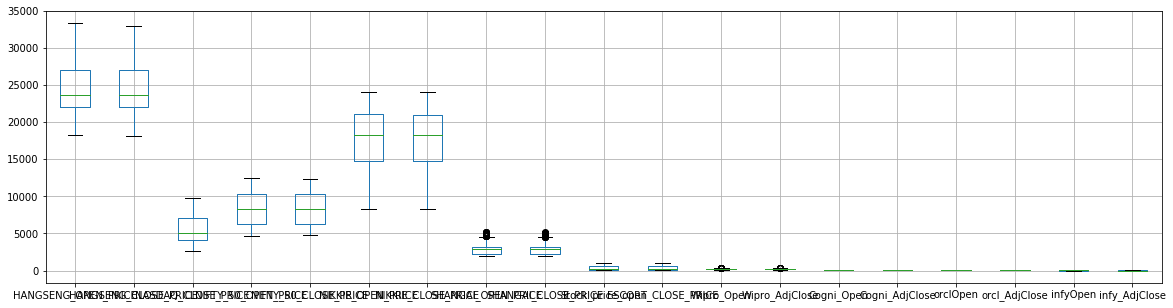

In [35]:
df.boxplot(figsize=(20,5))

In [36]:
df.columns

Index(['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE',
       'Stock_price_open', 'ESCORT_CLOSE_PRICE', 'Wipro_Open',
       'Wipro_AdjClose', 'Cogni_Open', 'Cogni_AdjClose', 'orclOpen',
       'orcl_AdjClose', 'infyOpen', 'infy_AdjClose'],
      dtype='object')

In [37]:
# Copy all the predictor variables into X dataframe
X = df[['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE'
       , 'ESCORT_CLOSE_PRICE',
       'Wipro_AdjClose', 'Cogni_AdjClose',
       'orcl_AdjClose', 'infy_AdjClose']]
# Copy target into the y dataframe. 
y = df[['Stock_price_open']]


In [38]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=25)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
params={ "fit_intercept":["True"],
    "normalize":["True"],
    "copy_X":["True"]}
Escort_linear_regression_model = LinearRegression(normalize=True)
RandomizedSearchCV(estimator=LinearRegression,
    param_distributions=params,
    n_iter=50,
    scoring=10,
    n_jobs=5,
    iid='warn',
    refit=True,
    cv='warn',
    verbose=0,
    pre_dispatch='2*n_jobs',
    random_state=None,
    error_score='raise-deprecating',
    return_train_score=False,)
Escort_linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
X_test

,HANGSENG_OPEN_PRICE,HANGSENG_CLOSE_PRICE,NASDAQ_CLOSE_PRICE,NIFTY_50_OPEN_PRICE,NIFTY_50_CLOSE_PRICE,NIKKIE_OPEN_PRICE,NIKKIE_CLOSE_PRICE,SHANGAI_OPEN_PRICE,SHANGAI_CLOSE_PRICE,ESCORT_CLOSE_PRICE,Wipro_AdjClose,Cogni_AdjClose,orcl_AdjClose,infy_AdjClose
369,22758.36914,22806.58008,3940.129883,6107.55,6101.10,14439.139650,14396.04004,2163.688965,2133.868896,88.771446,152.854523,42.699112,30.005047,4.134166
196,22500.99023,22605.98047,2971.330078,5860.50,5879.60,9681.200195,9737.55957,2077.416992,2150.625000,62.139572,112.690308,34.860043,28.722448,2.759331
69,20313.97070,19964.63086,2933.820068,4934.35,4928.90,9013.259766,8953.30957,2409.945068,2394.981934,63.650551,116.957909,29.457773,24.032866,2.549674
1565,26057.88086,25680.33008,7853.740234,11106.55,11057.85,20579.980470,20261.03906,2885.149902,2863.570068,475.250000,248.098389,59.246151,51.424255,10.842679
1098,25171.66016,25391.33984,6133.620117,9445.05,9438.25,19591.410160,19678.27930,3086.705078,3075.676025,611.552429,193.484283,63.388626,42.464272,6.572540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,22396.28906,21817.73047,3599.790039,5282.80,5302.55,13632.959960,13424.33008,2081.965088,2072.960938,80.736984,139.617371,34.845627,29.138933,3.391336
1332,28101.84961,28315.61914,7688.390137,10838.30,10772.65,21697.439450,21788.14063,2755.339111,2747.229004,873.613098,195.754730,78.545425,44.461266,9.053138
1605,26761.16016,26323.68945,8479.019531,11904.20,11872.10,23439.250000,23141.55078,2913.020020,2909.870117,651.900024,251.733704,62.452393,55.577423,9.733603
388,23829.97070,23681.27930,4017.750000,6062.70,6059.10,15504.780270,15515.24023,2186.058105,2183.072998,110.866768,150.027328,45.193573,31.625719,4.108864


In [41]:
intercept = Escort_linear_regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.3281330542285446


In [42]:
# R square on training data
Escort_linear_regression_model.score(X_train, y_train)

0.9998458104660305

In [43]:
# R square on testing data
Escort_linear_regression_model.score(X_test, y_test)

0.9998870031609994

In [44]:
y_pred = Escort_linear_regression_model.predict(X_test)
y_trnpred = Escort_linear_regression_model.predict(X_train)

# MSE Linear Regression

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

10.03517197209487

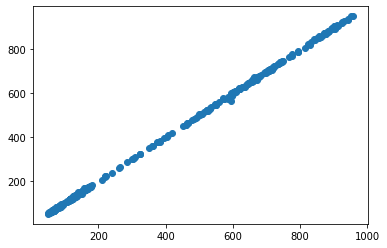

In [46]:
plt.scatter(y_test, y_pred)

# Lasoo Regression

In [47]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso,Ridge
from sklearn.pipeline import make_pipeline

In [48]:
lasso_model = Lasso(alpha =0.000001,max_iter = 100000, random_state=55)
lasso_model.fit(X_train,y_train) #Lasso model
y_pred = lasso_model.predict(X_test)


# MSE Lasoo Regression

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

11.599432636810777

# Ridge Regression and MSE

In [50]:
ridge_model = Ridge(alpha = 0.0000002,max_iter = 10000000,random_state = 55)
ridge_model.fit(X_train,y_train) #Ridge model
y_pred = ridge_model.predict(X_test)
mean_squared_error(y_test,y_pred)

10.035171971958032

### Linear Regression using statsmodels

In [51]:
X_train=pd.DataFrame(X_train)
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,HANGSENG_OPEN_PRICE,HANGSENG_CLOSE_PRICE,NASDAQ_CLOSE_PRICE,NIFTY_50_OPEN_PRICE,NIFTY_50_CLOSE_PRICE,NIKKIE_OPEN_PRICE,NIKKIE_CLOSE_PRICE,SHANGAI_OPEN_PRICE,SHANGAI_CLOSE_PRICE,ESCORT_CLOSE_PRICE,Wipro_AdjClose,Cogni_AdjClose,orcl_AdjClose,infy_AdjClose,Stock_price_open
932,21971.97070,21964.26953,5100.160156,8519.95,8541.20,16855.179690,16627.250000,3027.604004,3012.815918,245.301315,197.293045,56.099049,38.617432,7.086730,248.800003
166,21421.86914,21518.71094,3072.870117,5703.30,5718.70,8777.389648,8982.860352,2104.280029,2131.687988,64.736588,103.743416,33.341251,27.811871,2.942051,69.250000
412,22834.81055,22787.33008,4156.189941,6178.85,6168.35,15943.679690,15880.330080,2047.255981,2027.621948,116.768593,170.877548,47.837040,34.196869,4.305146,119.000000
502,23128.22070,23167.73047,4359.330078,7543.30,7540.70,15009.889650,15361.160160,2064.383057,2023.734985,137.351852,172.117371,47.053608,38.726242,4.662985,140.800003
74,19369.42969,18951.84961,2778.790039,4888.50,4891.45,8789.469727,8611.309570,2347.177002,2344.520996,61.714588,114.143196,28.659927,22.795620,2.499532,65.550003


In [52]:
data_train.columns

Index(['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE',
       'ESCORT_CLOSE_PRICE', 'Wipro_AdjClose', 'Cogni_AdjClose',
       'orcl_AdjClose', 'infy_AdjClose', 'Stock_price_open'],
      dtype='object')

In [53]:
expr= 'Stock_price_open ~ HANGSENG_OPEN_PRICE + HANGSENG_CLOSE_PRICE + NASDAQ_CLOSE_PRICE + NIKKIE_OPEN_PRICE + NIKKIE_CLOSE_PRICE + SHANGAI_OPEN_PRICE + SHANGAI_CLOSE_PRICE+ NIFTY_50_OPEN_PRICE + Wipro_AdjClose +Cogni_AdjClose +orcl_AdjClose +infy_AdjClose + NIFTY_50_CLOSE_PRICE +ESCORT_CLOSE_PRICE'

In [54]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept               2.328133
HANGSENG_OPEN_PRICE     0.000174
HANGSENG_CLOSE_PRICE   -0.000039
NASDAQ_CLOSE_PRICE     -0.002585
NIKKIE_OPEN_PRICE       0.000378
NIKKIE_CLOSE_PRICE     -0.000552
SHANGAI_OPEN_PRICE      0.000233
SHANGAI_CLOSE_PRICE    -0.000206
NIFTY_50_OPEN_PRICE     0.077980
Wipro_AdjClose          0.008554
Cogni_AdjClose          0.101075
orcl_AdjClose          -0.169698
infy_AdjClose          -0.608020
NIFTY_50_CLOSE_PRICE   -0.076222
ESCORT_CLOSE_PRICE      1.008392
dtype: float64

In [55]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       Stock_price_open   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.822e+05
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        14:21:01   Log-Likelihood:                -3436.2
No. Observations:                1272   AIC:                             6902.
Df Residuals:                    1257   BIC:                             6980.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.3281 

# Random Regression model

In [56]:

from sklearn.ensemble import RandomForestRegressor

In [57]:
rregression_model = RandomForestRegressor(n_estimators = 100,max_features=6,random_state=0)
rregression_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [58]:
ytrain_predict = rregression_model.predict(X_train)
ytest_predict = rregression_model.predict(X_test)

In [59]:
print (pd.DataFrame(rregression_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                           Imp
NASDAQ_CLOSE_PRICE    0.357997
ESCORT_CLOSE_PRICE    0.350018
orcl_AdjClose         0.096790
NIFTY_50_OPEN_PRICE   0.080461
NIFTY_50_CLOSE_PRICE  0.062895
Cogni_AdjClose        0.016639
HANGSENG_CLOSE_PRICE  0.009195
NIKKIE_OPEN_PRICE     0.007556
infy_AdjClose         0.005708
HANGSENG_OPEN_PRICE   0.005041
Wipro_AdjClose        0.004312
SHANGAI_CLOSE_PRICE   0.001285
SHANGAI_OPEN_PRICE    0.001108
NIKKIE_CLOSE_PRICE    0.000996


In [60]:
mean_squared_error(y_test,ytest_predict)

63.093374306881785

# Hyperparameter tunning

In [2]:
param_grid = {
    'max_depth': [6,12],
    'max_features': [2, 8],
    'min_samples_leaf': [3,7, 15,30,45],
    'min_samples_split': [30,45, 50,100],
    'n_estimators': [300, 500,400]
}

rfr = RandomForestRegressor(random_state=0)


NameError: name 'RF_model' is not defined

In [62]:
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'max_depth': 12, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 400}


In [63]:
RF_model = RandomForestRegressor(max_depth=12, max_features=8, 
                            min_samples_leaf= 7,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=43)
RF_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=43, verbose=0,
                      warm_start=False)

In [64]:
ytrain_predict = rregression_model.predict(X_train)
ytest_predict = rregression_model.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ytest_predict)

94.99501324387701

In [66]:
from sklearn.svm import SVR
SVR_regression_model = SVR()
SVR_regression_model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
SVR_ytrain_predict = SVR_regression_model.predict(X_train)
SVR_ytest_predict = SVR_regression_model.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,SVR_ytest_predict)

127699.25396301429

# AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostRegressor

In [70]:
AdaBoost_Model=AdaBoostRegressor(
    n_estimators=1000,
    learning_rate=10.0,
    loss='linear',
    random_state=24,)
AdaBoost_Model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=10.0, loss='linear',
                  n_estimators=1000, random_state=24)

In [71]:
y_AdaBoost_Model = AdaBoost_Model.predict(X_test)

In [72]:
mean_squared_error(y_test,y_AdaBoost_Model)

8557.103744780525

# Extreme Gradient Boosting and MSE

In [73]:
import xgboost as xgb
xgbr_Model = xgb.XGBRegressor(random_state=0,n_estimators=500) 
xgbr_Model.fit(X_train, y_train)
y_xgbr_Model = xgbr_Model.predict(X_test)


In [74]:
mean_squared_error(y_test,y_xgbr_Model)

42.53174107208117

# Test on Live Data 

In [75]:
Live=pd.read_csv("test.csv")

In [76]:
# Copy all the predictor variables into X dataframe
x_live = Live[['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE'
       , 'ESCORT_CLOSE_PRICE',
       'Wipro_AdjClose', 'Cogni_AdjClose',
       'orcl_AdjClose', 'infy_AdjClose']]

# Copy target into the y dataframe. 
A_live= Live[['Stock_price_open']]

In [77]:
Linear_Predicted_Escort = Escort_linear_regression_model.predict(x_live)
Regression_Predicted = rregression_model.predict(x_live)
Lasoo_Predicted = lasso_model.predict(x_live)
Ridge_Predicted = ridge_model.predict(x_live)
XtrmGradient_Predicted = xgbr_Model.predict(x_live)

In [78]:
Result=A_live

In [79]:
Result["Linear_Predicted_Escort"]=Linear_Predicted_Escort
Result["Ridge_Predicted"]=Ridge_Predicted
Result["Lasoo_Predicted"]=Lasoo_Predicted
Result["Regression_Predicted"]=Regression_Predicted
Result["XtrmGradient_Predicted"]=XtrmGradient_Predicted

In [80]:
Result

,Stock_price_open,Linear_Predicted_Escort,Ridge_Predicted,Lasoo_Predicted,Regression_Predicted,XtrmGradient_Predicted
0,757.500000,758.779236,758.779236,753.155889,756.164852,761.201660
1,747.349976,741.778875,741.778875,739.159872,748.752010,750.887024
2,751.799988,743.305574,743.305574,746.923237,757.191645,763.701538
3,785.000000,789.308093,789.308093,775.817398,767.660683,759.838623
4,795.900024,794.194309,794.194309,800.921025,789.644679,798.222229
5,810.000000,791.763441,791.763441,791.032344,787.224034,797.732666
6,824.950012,819.452627,819.452627,819.386880,797.928529,823.261108
7,820.700012,814.602685,814.602685,810.147333,773.942828,789.653442
8,835.549988,830.041566,830.041566,830.287063,787.235028,821.557007
9,870.000000,862.023251,862.023251,862.155497,827.210177,867.288208


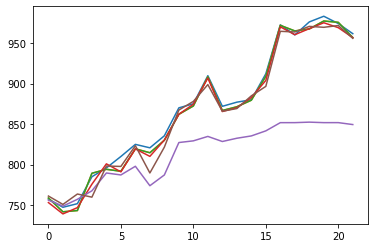

In [82]:
plt.plot(Result)

In [83]:
from joblib import dump, load
dump(Escort_linear_regression_model,"ESCORT_STOCK_OPEN_PRICE.joblib")

['ESCORT_STOCK_OPEN_PRICE.joblib']

In [84]:
ESCORT_STOCK_OPEN_PRICE=load('ESCORT_STOCK_OPEN_PRICE.joblib')

In [85]:
df.columns

Index(['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE',
       'Stock_price_open', 'ESCORT_CLOSE_PRICE', 'Wipro_Open',
       'Wipro_AdjClose', 'Cogni_Open', 'Cogni_AdjClose', 'orclOpen',
       'orcl_AdjClose', 'infyOpen', 'infy_AdjClose'],
      dtype='object')

In [86]:
# Copy all the predictor variables into X dataframe
X = df[['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE'
       , 'ESCORT_CLOSE_PRICE',
       'Wipro_AdjClose', 'Cogni_AdjClose',
       'orcl_AdjClose', 'infy_AdjClose']]

# Copy target into the y dataframe. 
y = df[['Wipro_Open']]


In [87]:
X

,HANGSENG_OPEN_PRICE,HANGSENG_CLOSE_PRICE,NASDAQ_CLOSE_PRICE,NIFTY_50_OPEN_PRICE,NIFTY_50_CLOSE_PRICE,NIKKIE_OPEN_PRICE,NIKKIE_CLOSE_PRICE,SHANGAI_OPEN_PRICE,SHANGAI_CLOSE_PRICE,ESCORT_CLOSE_PRICE,Wipro_AdjClose,Cogni_AdjClose,orcl_AdjClose,infy_AdjClose
0,18770.64063,18727.31055,2648.360107,4749.00,4749.65,8434.900391,8560.110352,2177.517090,2169.389893,62.989307,120.455070,31.702309,23.053185,3.101822
1,18970.59961,18813.41016,2669.860107,4724.15,4749.95,8549.540039,8488.709961,2211.995117,2148.451904,61.738796,119.504265,32.341549,23.567247,3.149049
2,18588.35938,19004.27930,2702.500000,4863.15,4849.55,8488.980469,8422.259766,2164.740967,2285.743896,65.351418,116.221107,33.528698,23.957426,3.260410
3,18948.11914,19151.93945,2710.760010,4840.95,4860.95,8422.990234,8447.879883,2221.832031,2276.045898,67.852463,115.573708,33.778629,23.886366,3.315801
4,19071.90039,19095.38086,2724.699951,4861.95,4831.25,8440.959961,8385.589844,2282.913086,2275.010010,67.898773,112.736732,33.216290,24.135090,3.023110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,24247.83984,23893.35938,8495.379883,9232.35,9187.30,19479.830080,19137.949220,2842.237061,2843.979980,749.750000,178.550003,52.043640,52.270000,8.431845
1692,23540.53906,23977.32031,8494.750000,9163.90,9313.90,19109.179690,19429.439450,2814.065918,2838.499023,752.200012,180.899994,52.432030,51.970001,8.668528
1693,23983.65039,23831.33008,8634.519531,9259.70,9154.40,19313.039060,19262.000000,2850.510010,2808.529053,717.000000,177.750000,53.587227,53.009998,8.638943
1694,23844.55078,24280.14063,8730.160156,9389.80,9282.30,19331.859380,19783.220700,2834.938965,2815.495117,709.099976,182.050003,55.807995,53.369999,8.806593


In [88]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=46)

In [89]:
Wipro_Open_linear_regression_model = LinearRegression(normalize=True)
Wipro_Open_linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [90]:
y_pred = Wipro_Open_linear_regression_model.predict(X_test)
y_trnpred = Wipro_Open_linear_regression_model.predict(X_train)

In [91]:
mean_squared_error(y_test,y_pred)

16.01280549120787

In [92]:
from joblib import dump, load
dump(Wipro_Open_linear_regression_model,"WIPRO_STOCK_OPEN_PRICE.joblib")
WIPRO_STOCK_OPEN_PRICE_PREDICTED =load('WIPRO_STOCK_OPEN_PRICE.joblib')

In [93]:
# Copy all the predictor variables into X dataframe
X = df[['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE'
       , 'ESCORT_CLOSE_PRICE',
       'Wipro_AdjClose', 'Cogni_AdjClose',
       'orcl_AdjClose', 'infy_AdjClose']]
# Copy target into the y dataframe. 
y = df[['Cogni_Open']]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=0)

In [95]:
Cogni_Open_linear_regression_model = LinearRegression(normalize=True)
Cogni_Open_linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [96]:
y_pred = Cogni_Open_linear_regression_model.predict(X_test)
y_trnpred = Cogni_Open_linear_regression_model.predict(X_train)

In [97]:
mean_squared_error(y_test,y_pred)

0.3889323957496241

In [98]:
from joblib import dump, load
dump(Cogni_Open_linear_regression_model,"COGNI_STOCK_OPEN_PRICE.joblib")
COGNI_STOCK_OPEN_PRICE_PREDICTED =load('COGNI_STOCK_OPEN_PRICE.joblib')

In [99]:
# Copy all the predictor variables into X dataframe
X = df[['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE'
       , 'ESCORT_CLOSE_PRICE',
       'Wipro_AdjClose', 'Cogni_AdjClose',
       'orcl_AdjClose', 'infy_AdjClose']]

# Copy target into the y dataframe. 
y = df[['orclOpen']]

In [100]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=0)

In [101]:
orclOpen_linear_regression_model = LinearRegression(normalize=True)
orclOpen_linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [102]:
y_pred = orclOpen_linear_regression_model.predict(X_test)
y_trnpred = orclOpen_linear_regression_model.predict(X_train)

In [103]:
mean_squared_error(y_test,y_pred)

0.18503644528103225

In [104]:
from joblib import dump, load
dump(orclOpen_linear_regression_model,"ORCL_STOCK_OPEN_PRICE.joblib")
ORCL_STOCK_OPEN_PRICE_PREDICTED =load('ORCL_STOCK_OPEN_PRICE.joblib')

In [105]:
# Copy all the predictor variables into X dataframe
X = df[['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE'
       , 'ESCORT_CLOSE_PRICE',
       'Wipro_AdjClose', 'Cogni_AdjClose',
       'orcl_AdjClose', 'infy_AdjClose']]
# Copy target into the y dataframe. 
y = df[['infyOpen']]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=125)


In [107]:

INFY_Open_linear_regression_model = LinearRegression(normalize=True)
INFY_Open_linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [108]:
y_pred = INFY_Open_linear_regression_model.predict(X_test)
y_trnpred = INFY_Open_linear_regression_model.predict(X_train)

In [109]:
mean_squared_error(y_test,y_pred)

0.07468510180202449

In [110]:
from joblib import dump, load
dump(INFY_Open_linear_regression_model,"INFY_Open_linear_regression_model.joblib")
INFY_STOCK_OPEN_PRICE_PREDICTED =load('INFY_Open_linear_regression_model.joblib')

In [111]:
Live=pd.read_csv("test.csv")

In [112]:
Live.columns

Index(['Unnamed: 0', 'HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE',
       'NASDAQ_CLOSE_PRICE', 'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE',
       'NIKKIE_OPEN_PRICE', 'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE',
       'SHANGAI_CLOSE_PRICE', 'Stock_price_open', 'ESCORT_CLOSE_PRICE',
       'Wipro_Open', 'Wipro_AdjClose', 'Cogni_Open', 'Cogni_AdjClose',
       'orclOpen', 'orcl_AdjClose', 'infyOpen', 'infy_AdjClose'],
      dtype='object')

In [113]:
# Copy all the predictor variables into X dataframe
x_live = Live[['HANGSENG_OPEN_PRICE', 'HANGSENG_CLOSE_PRICE', 'NASDAQ_CLOSE_PRICE',
       'NIFTY_50_OPEN_PRICE', 'NIFTY_50_CLOSE_PRICE', 'NIKKIE_OPEN_PRICE',
       'NIKKIE_CLOSE_PRICE', 'SHANGAI_OPEN_PRICE', 'SHANGAI_CLOSE_PRICE'
       , 'ESCORT_CLOSE_PRICE',
       'Wipro_AdjClose', 'Cogni_AdjClose',
       'orcl_AdjClose', 'infy_AdjClose']]

# Copy target into the y dataframe. 
Wipro_Open_Actual= Live[['Wipro_Open']]
COGNI_Open_Actual=Live[['Cogni_Open']]
ORCL_Open_Actual=Live[['orclOpen']]
INFY_Open_Actual=Live[['infyOpen']]
ESCORT_Open_Actual=Live[['Stock_price_open']]

In [114]:
WIPRO_pred = Wipro_Open_linear_regression_model.predict(x_live)
COGNI_pred = Cogni_Open_linear_regression_model.predict(x_live)
ORCL_pred= orclOpen_linear_regression_model.predict(x_live)
ESCORT_pred = Escort_linear_regression_model.predict(x_live)
INFY_pred = INFY_Open_linear_regression_model.predict(x_live)

In [115]:
TABL=ESCORT_Open_Actual
TABL["ESCORT_pred"]=ESCORT_pred
TABL["WIPRO_pred"]=WIPRO_pred
TABL["Wipro_Open_Actual"]=Wipro_Open_Actual
TABL["COGNI_pred"]=COGNI_pred
TABL["COGNI_Open_Actual"]=COGNI_Open_Actual
TABL["ORCL_pred"]=ORCL_pred
TABL["ORCL_Open_Actual"]=ORCL_Open_Actual
TABL["INFY_pred"]=INFY_pred
TABL["INFY_Open"]=INFY_Open_Actual

In [116]:
TABL

,Stock_price_open,ESCORT_pred,WIPRO_pred,Wipro_Open_Actual,COGNI_pred,COGNI_Open_Actual,ORCL_pred,ORCL_Open_Actual,INFY_pred,INFY_Open
0,757.500000,758.779236,186.819005,185.199997,58.890371,55.000000,52.273600,53.189999,9.104109,9.08
1,747.349976,741.778875,185.419712,185.000000,56.899103,56.320000,53.019687,53.130001,9.101814,9.14
2,751.799988,743.305574,184.023212,184.199997,54.657781,55.250000,52.618112,53.799999,8.786650,9.17
3,785.000000,789.308093,190.994440,191.500000,53.798003,52.639999,52.091743,52.430000,9.238284,9.13
4,795.900024,794.194309,184.511069,184.750000,48.404969,49.139999,50.573145,51.139999,8.119132,8.46
5,810.000000,791.763441,183.963195,186.000000,50.259831,49.860001,52.105109,52.700001,8.416357,8.55
6,824.950012,819.452627,180.456418,182.050003,49.594637,52.090000,51.970281,53.910000,8.349766,8.87
7,820.700012,814.602685,182.827132,182.250000,52.829930,52.509998,52.270956,53.180000,8.800569,8.96
8,835.549988,830.041566,182.937507,185.000000,50.988588,52.169998,51.249434,53.090000,8.520434,8.89
9,870.000000,862.023251,182.345784,183.399994,52.030145,52.439999,51.680951,52.759998,8.630708,8.96


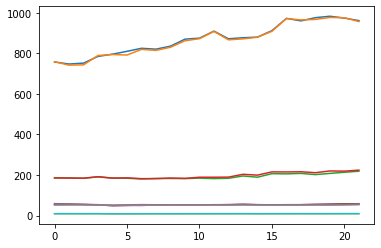

In [117]:
plt.plot(TABL)